In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

nb_classes = 10

In [37]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [38]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [40]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /=255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [42]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

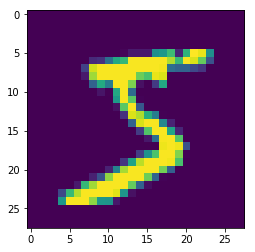

In [43]:
plt.imshow(X_train[0].reshape(28, 28))

In [44]:
network_history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 52us/step - loss: 2.2221 - accuracy: 0.2108 - val_loss: 2.0851 - val_accuracy: 0.3695
Epoch 2/30
48000/48000 [==============================] - 2s 50us/step - loss: 1.9784 - accuracy: 0.4906 - val_loss: 1.8405 - val_accuracy: 0.6155
Epoch 3/30
48000/48000 [==============================] - 2s 49us/step - loss: 1.7336 - accuracy: 0.6511 - val_loss: 1.5880 - val_accuracy: 0.7185
Epoch 4/30
48000/48000 [==============================] - 2s 50us/step - loss: 1.4894 - accuracy: 0.7175 - val_loss: 1.3473 - val_accuracy: 0.7663
Epoch 5/30
48000/48000 [==============================] - 2s 50us/step - loss: 1.2700 - accuracy: 0.7562 - val_loss: 1.1435 - val_accuracy: 0.7918
Epoch 6/30
48000/48000 [==============================] - 2s 50us/step - loss: 1.0924 - accuracy: 0.7810 - val_loss: 0.9843 - val_accuracy: 0.8133
Epoch 7/30
48000/48000 [==============================] - 2s 50us/st

In [45]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend('Training', 'Validation')

C:\Users\Dani\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Dani\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Dani\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Dani\Anaconda3\lib\site-p

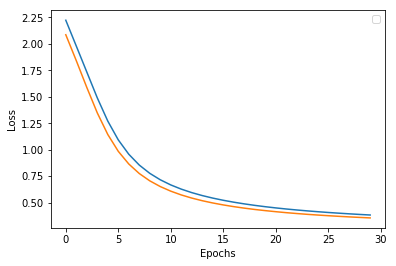

In [46]:
plot_history(network_history)

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [48]:
preds = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [50]:
conf = confusion_matrix(y_test, np.argmax(preds, axis=1))

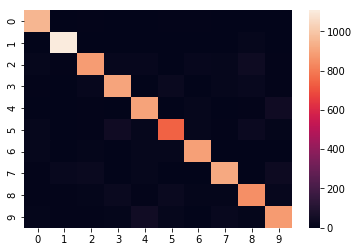

In [51]:
sns.heatmap(conf)